In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
pf=pd.read_csv('bodyPerformance.csv',delimiter=',')

In [2]:
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [3]:
pf

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


# Data munging:

# 1-Explore Data

In [4]:
pf.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
pf.shape

(13393, 12)

In [6]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [7]:
pf.sample(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
7188,28.0,F,167.5,58.7,21.9,68.0,134.0,30.4,17.6,38.0,195.0,B
9556,32.0,M,166.0,66.1,24.0,74.0,134.0,37.6,23.2,47.0,230.0,A
7549,25.0,M,169.8,70.0,16.9,62.0,136.0,43.7,8.0,49.0,211.0,C
5481,38.0,M,178.5,97.8,27.5,90.0,158.0,48.3,13.6,44.0,215.0,B
5286,46.0,F,161.8,59.7,36.4,82.0,127.0,21.6,0.5,10.0,123.0,D
9390,37.0,F,159.5,54.5,31.9,87.0,120.0,24.2,16.9,22.0,127.0,D
6641,38.0,M,184.0,77.1,21.9,86.0,155.0,52.1,21.7,34.0,218.0,C
5317,24.0,F,161.1,51.2,24.8,90.0,135.0,30.7,22.4,38.0,173.0,A
13089,53.0,F,163.5,56.7,30.1,74.0,140.0,24.7,12.0,8.0,120.0,D
650,39.0,M,169.9,62.7,19.9,67.0,130.0,39.0,24.8,57.0,192.0,C


In [8]:
pf[pf.age>=25]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13387,39.0,M,174.4,70.80,24.3,78.0,132.0,41.6,12.0,44.0,168.0,B
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [9]:
pf_numeric = pf.select_dtypes(include=[np.number])
numeric_cols = pf_numeric.columns.values
print(numeric_cols)

['age' 'height_cm' 'weight_kg' 'body fat_%' 'diastolic' 'systolic'
 'gripForce' 'sit and bend forward_cm' 'sit-ups counts' 'broad jump_cm']


In [10]:
pf_non_numeric = pf.select_dtypes(exclude=[np.number])
non_numeric_cols = pf_non_numeric.columns.values
print(non_numeric_cols)

['gender' 'class']


# 2-Clean Data


In [11]:
pf.duplicated () 

0        False
1        False
2        False
3        False
4        False
         ...  
13388    False
13389    False
13390    False
13391    False
13392    False
Length: 13393, dtype: bool

<AxesSubplot:>

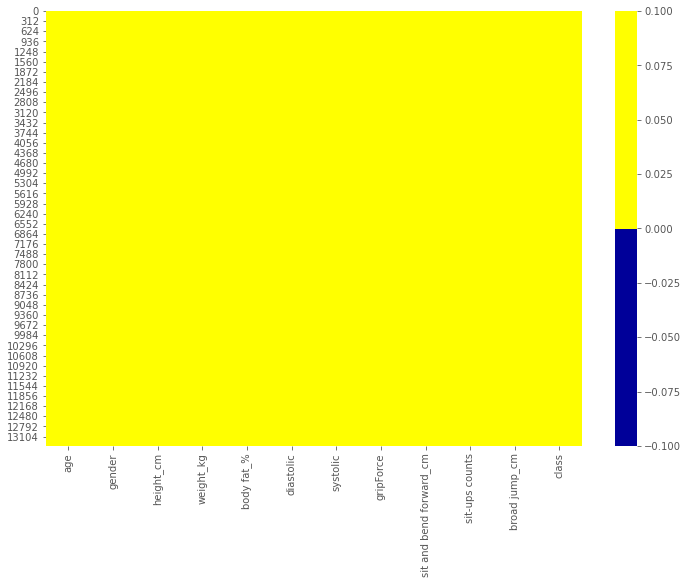

In [12]:
#Missing Data Heatmap
cols = pf.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(pf[cols].isnull(), cmap=sns.color_palette(colours))


In [13]:
# Missing Data Percentage List
# % of missing.
for col in pf.columns:
    pct_missing = np.mean(pf[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0%
gender - 0%
height_cm - 0%
weight_kg - 0%
body fat_% - 0%
diastolic - 0%
systolic - 0%
gripForce - 0%
sit and bend forward_cm - 0%
sit-ups counts - 0%
broad jump_cm - 0%
class - 0%


In [14]:
# We don't have any missing value to clean up

# 3-Descriptive statistics

In [16]:
pf.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [18]:
pf.mean()

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64

In [19]:
pf.count()

age                        13393
gender                     13393
height_cm                  13393
weight_kg                  13393
body fat_%                 13393
diastolic                  13393
systolic                   13393
gripForce                  13393
sit and bend forward_cm    13393
sit-ups counts             13393
broad jump_cm              13393
class                      13393
dtype: int64

In [20]:
pf.median()

age                         32.0
height_cm                  169.2
weight_kg                   67.4
body fat_%                  22.8
diastolic                   79.0
systolic                   130.0
gripForce                   37.9
sit and bend forward_cm     16.2
sit-ups counts              41.0
broad jump_cm              193.0
dtype: float64

In [21]:
pf.max()

age                         64.0
gender                         M
height_cm                  193.8
weight_kg                  138.1
body fat_%                  78.4
diastolic                  156.2
systolic                   201.0
gripForce                   70.5
sit and bend forward_cm    213.0
sit-ups counts              80.0
broad jump_cm              303.0
class                          D
dtype: object

In [22]:
pf.min()

age                         21.0
gender                         F
height_cm                  125.0
weight_kg                   26.3
body fat_%                   3.0
diastolic                    0.0
systolic                     0.0
gripForce                    0.0
sit and bend forward_cm    -25.0
sit-ups counts               0.0
broad jump_cm                0.0
class                          A
dtype: object

# Data Visualization

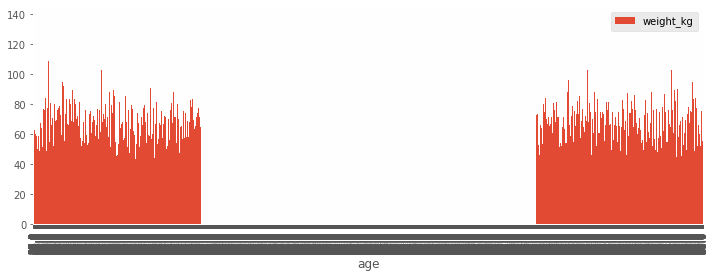

In [22]:
#plotting 
plot=pf.plot(x='age',y='weight_kg',kind='bar',figsize=(12,4))

In [23]:
sample=pf.sample(50)
sample

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
9738,28.0,M,179.0,64.20,18.0,80.0,119.0,30.7,8.6,42.0,189.0,C
4709,23.0,M,175.7,74.80,15.3,66.0,122.0,38.9,21.1,57.0,246.0,A
11283,30.0,M,179.1,81.60,23.7,86.0,134.0,45.0,17.4,47.0,230.0,B
88,24.0,F,159.0,45.50,24.5,85.0,135.0,28.5,22.9,57.0,197.0,A
9310,29.0,M,172.7,76.60,24.2,85.0,136.0,44.0,21.9,48.0,215.0,B
4192,23.0,M,169.7,71.68,29.7,87.0,134.0,37.5,22.2,30.0,198.0,D
6633,22.0,F,159.5,53.60,25.8,79.0,134.0,23.3,21.1,35.0,139.0,B
7834,29.0,M,171.2,73.00,20.2,67.0,119.0,39.9,19.6,44.0,211.0,C
10154,32.0,M,168.5,73.60,23.4,64.0,120.0,38.9,7.6,56.0,200.0,C
3867,22.0,F,158.5,53.00,26.0,79.0,129.0,25.9,21.7,34.0,172.0,B


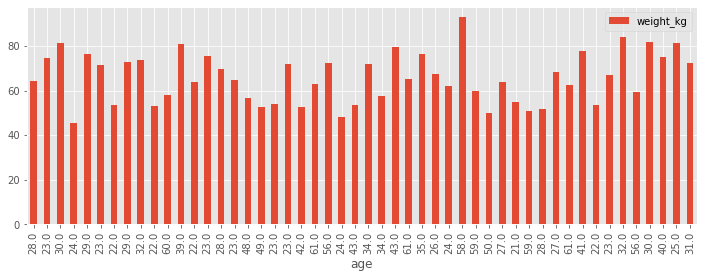

In [24]:
#plotting

plot=sample.plot(x='age',y='weight_kg',kind='bar',figsize=(12,4))

In [25]:
sample1=pf.sample(30)

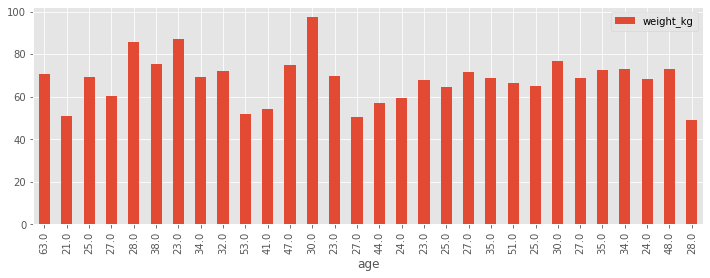

In [26]:
plot=sample1.plot(x='age',y='weight_kg',kind='bar',figsize=(12,4))

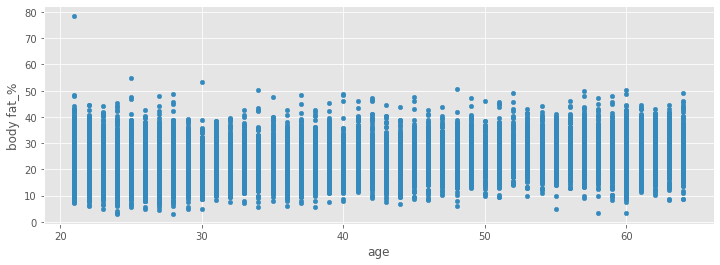

In [27]:
plot2=pf.plot(x='age',y='body fat_%',kind='scatter',figsize=(12,4)) #for all dataset

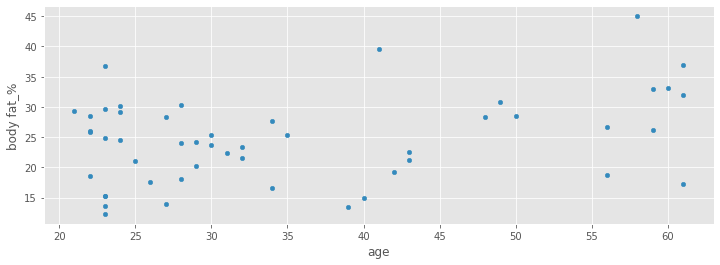

In [28]:
plot2=sample.plot(x='age',y='body fat_%',kind='scatter',figsize=(12,4))

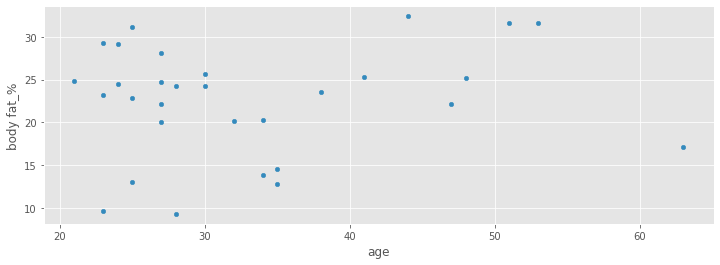

In [29]:
plot2=sample1.plot(x='age',y='body fat_%',kind='scatter',figsize=(12,4))

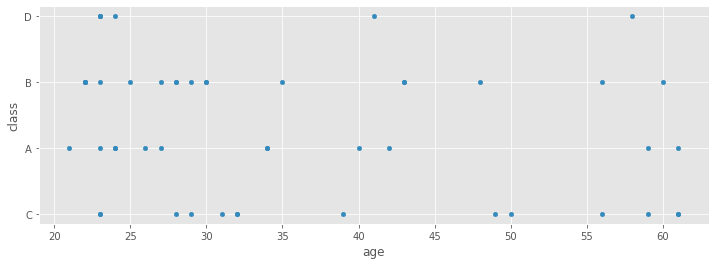

In [30]:
plot2=sample.plot(x='age',y='class',kind='scatter',figsize=(12,4))

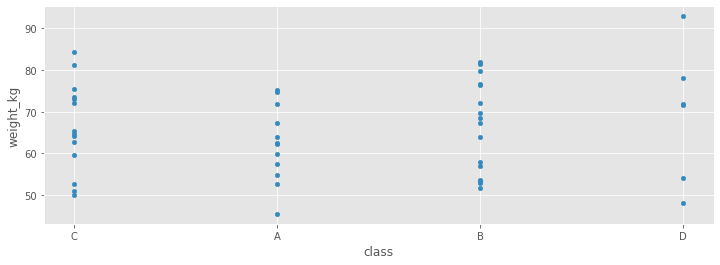

In [31]:
plot2=sample.plot(x='class',y='weight_kg',kind='scatter',figsize=(12,4))

<AxesSubplot:>

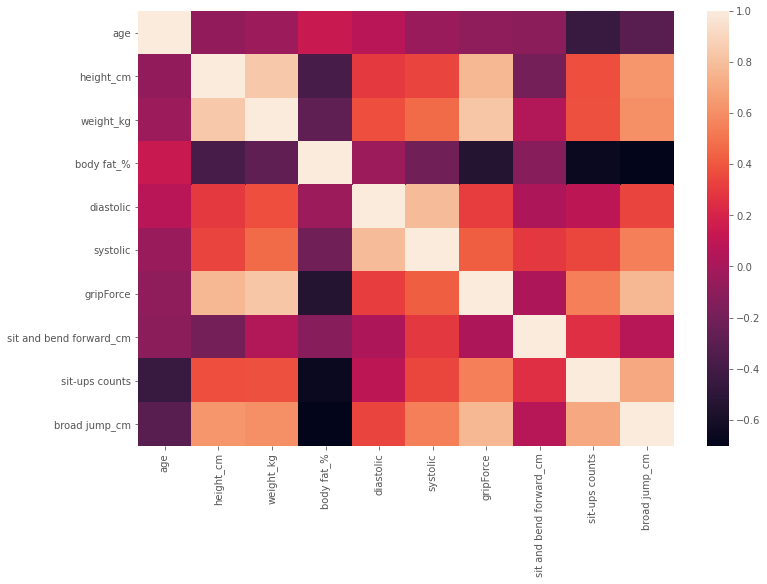

In [32]:
sns.heatmap(sample1.corr())

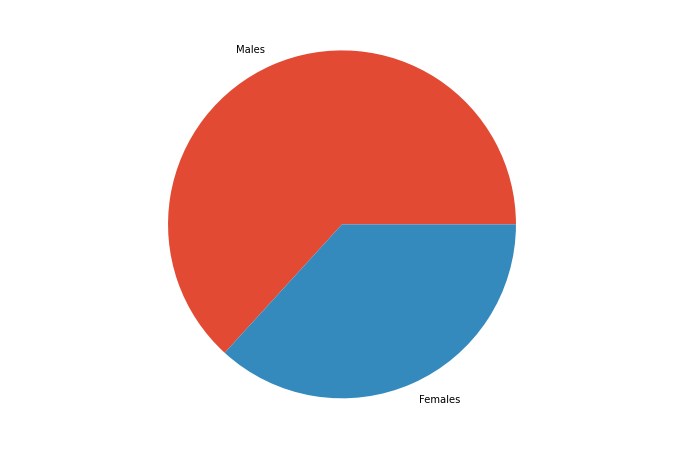

In [33]:
gender_vals = [8467,4926] 
gender_labels = ["Males","Females"]
plt.axis("equal")
plt.pie(gender_vals,labels=gender_labels)
plt.show()

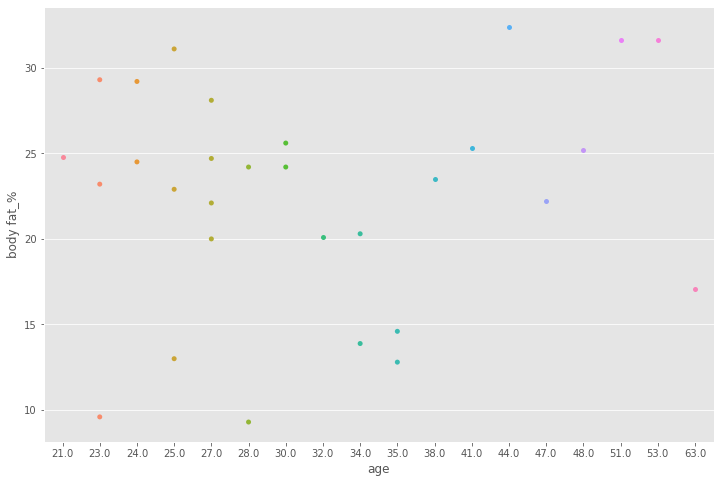

In [34]:

sns.swarmplot(x="age", y="body fat_%", data=sample1)

# Show plot
plt.show()


<AxesSubplot:ylabel='Count'>

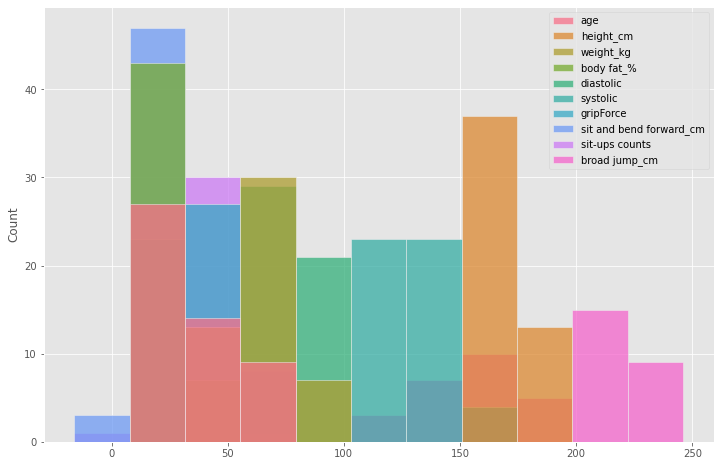

In [35]:
sns.histplot(sample)

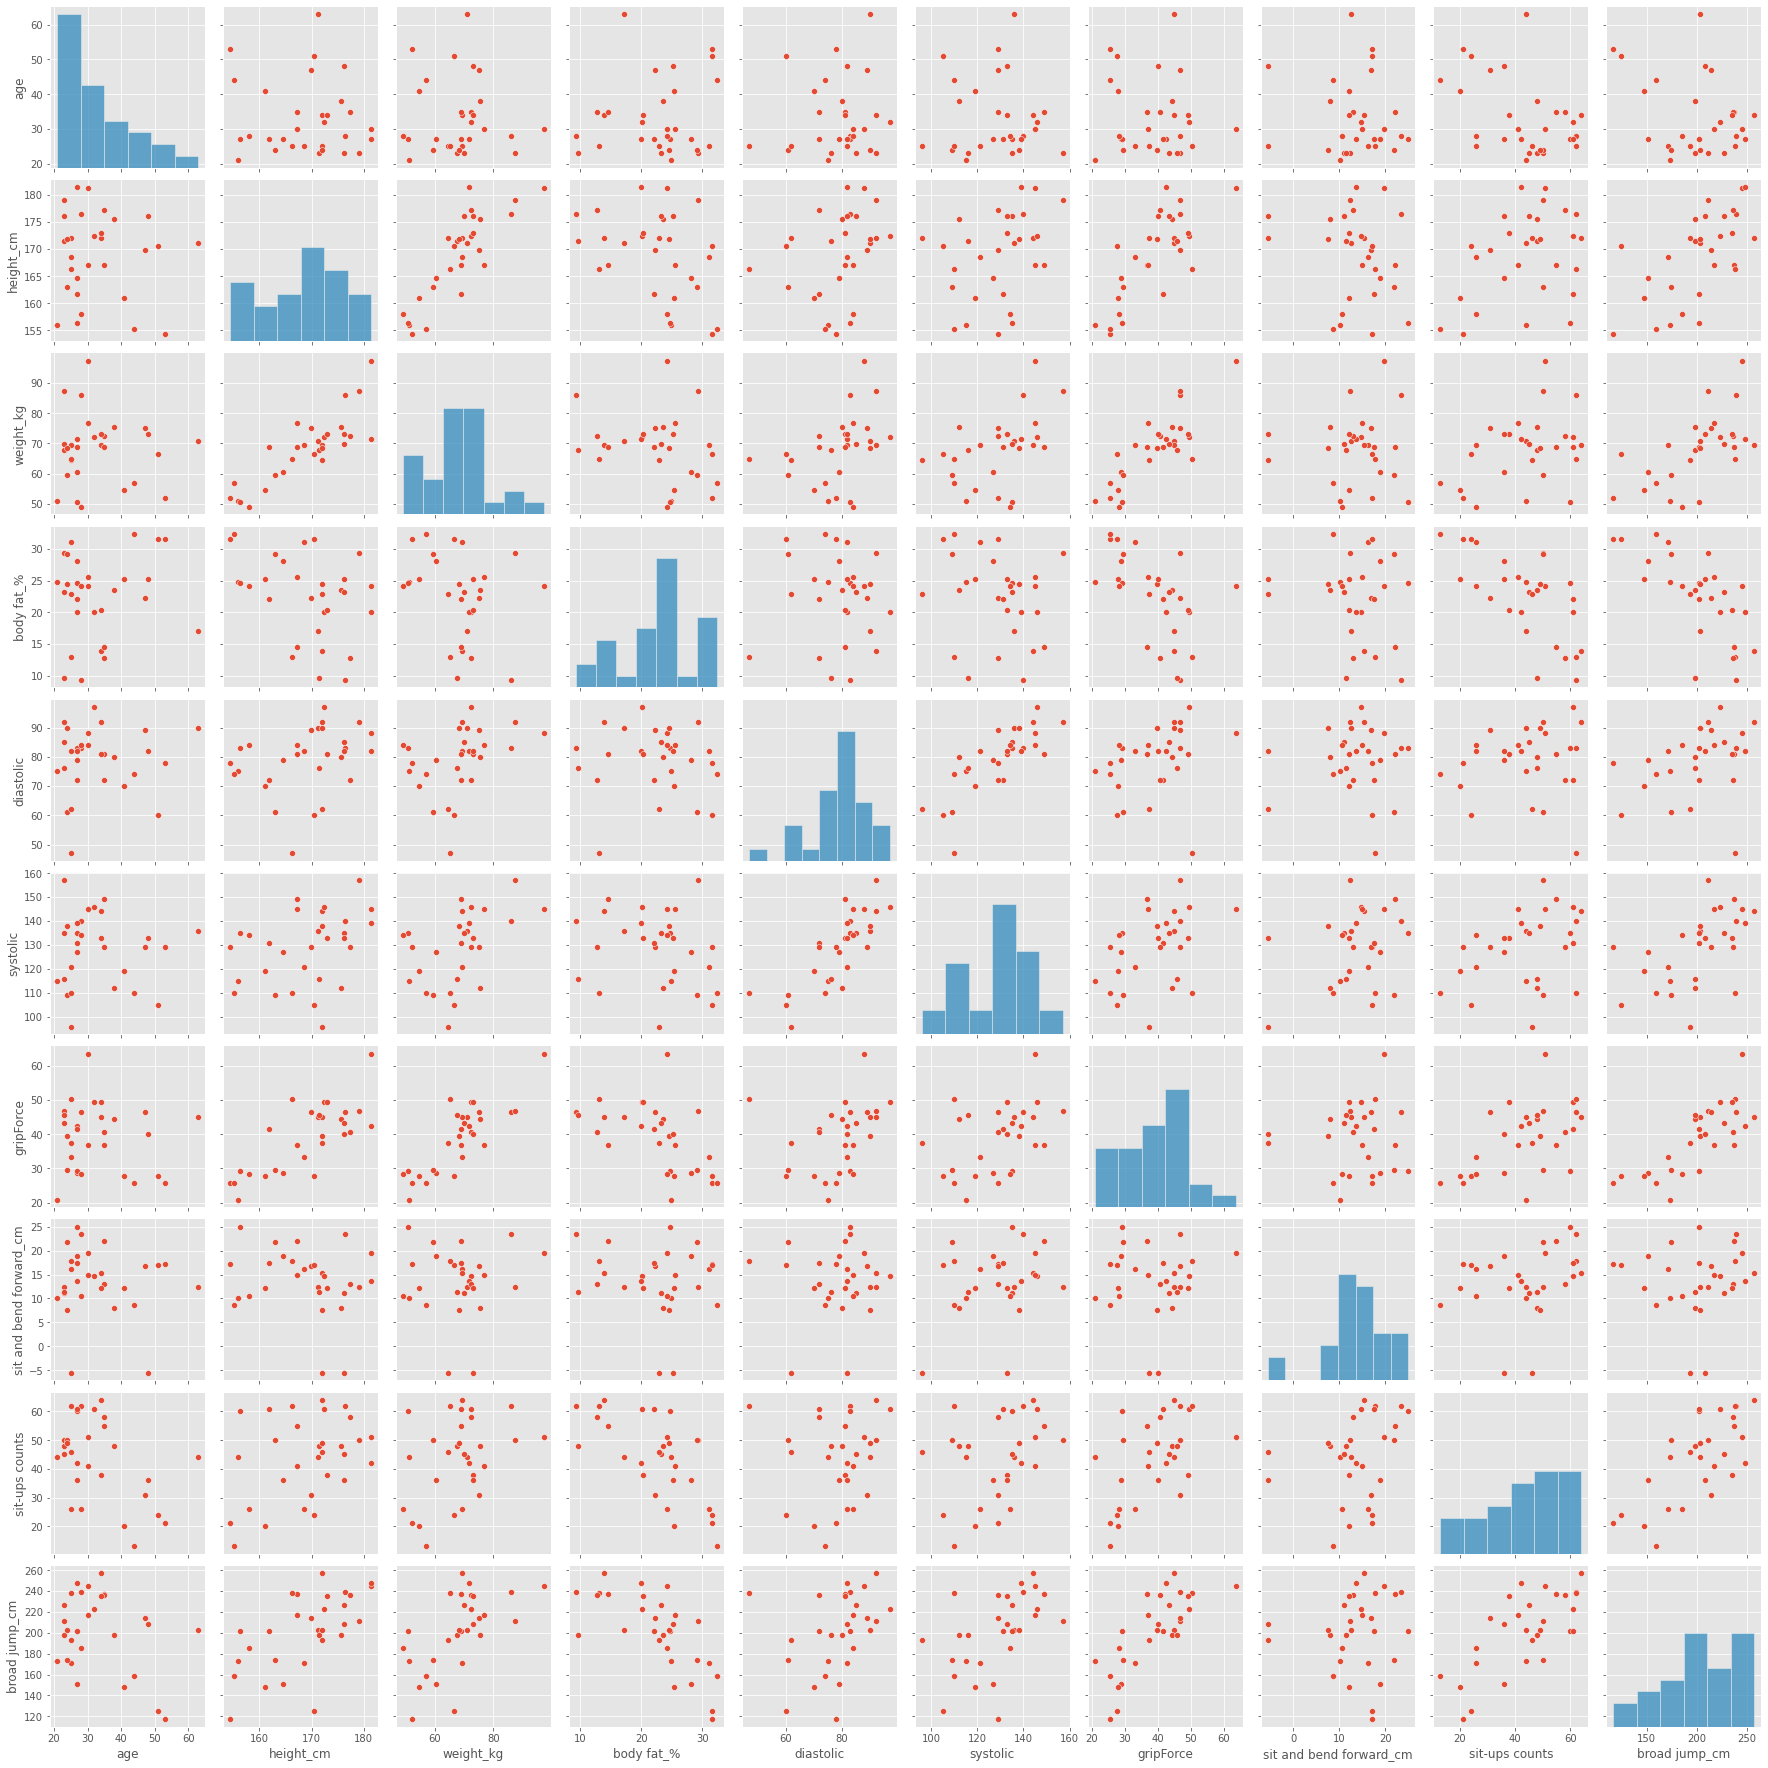

In [36]:
sns.pairplot(sample1)

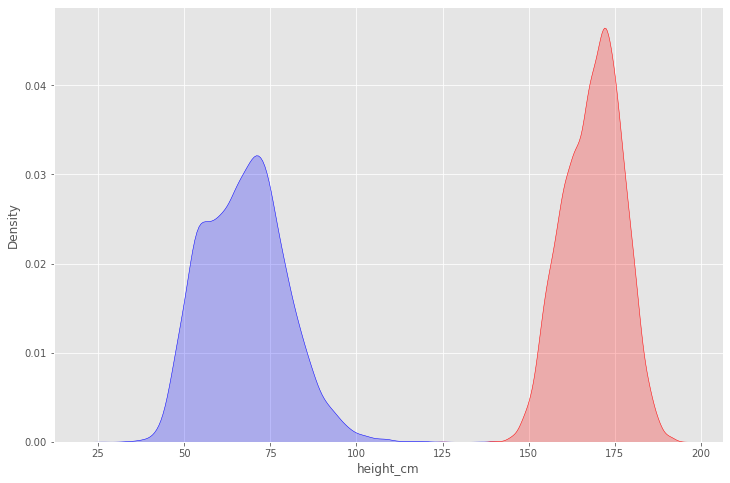

In [37]:
fig = sns.kdeplot(pf['height_cm'], shade=True, color="r")
fig = sns.kdeplot(pf['weight_kg'], shade=True, color="b")
plt.show()

# Linear Regression 

In [38]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [39]:
pf1=pf.drop(columns=['gender','class'])

In [40]:
X=pf1.drop(['body fat_%'],axis=1).values
y=pf1['body fat_%'].values

In [41]:
print(X)

[[ 27.   172.3   75.24 ...  18.4   60.   217.  ]
 [ 25.   165.    55.8  ...  16.3   53.   229.  ]
 [ 31.   179.6   78.   ...  12.    49.   181.  ]
 ...
 [ 39.   177.2   80.5  ...  16.4   45.   229.  ]
 [ 64.   146.1   57.7  ...   9.2    0.    75.  ]
 [ 34.   164.    66.1  ...   7.1   51.   180.  ]]


In [42]:
print(y)

[21.3 15.7 20.1 ... 20.1 40.4 19.5]


In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [44]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Visualizing the Training set

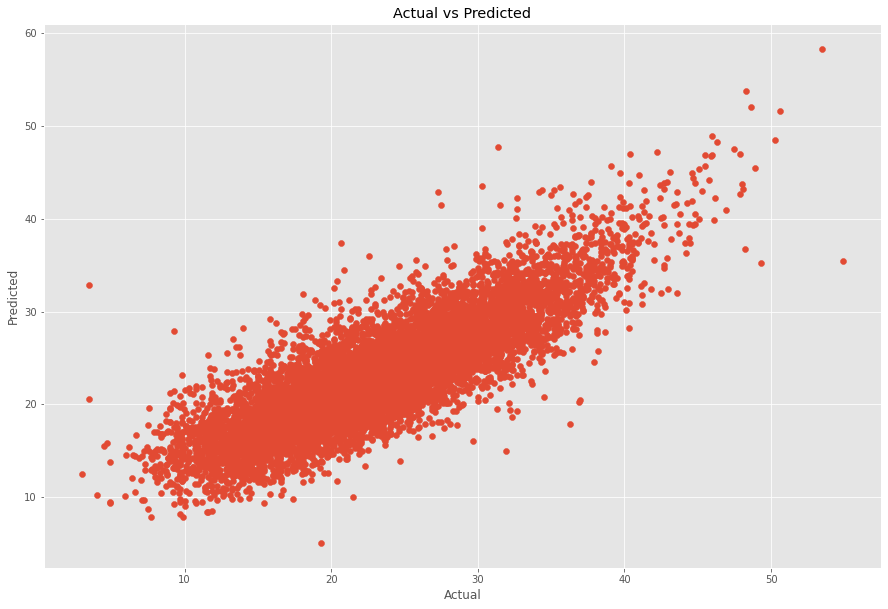

In [45]:
y_pred_train = regressor.predict(X_train)

plt.figure(figsize =(15,10))
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [46]:
y_pred = regressor.predict(X_test)
y_pred

array([16.0334437 , 17.90161073, 19.89612314, ..., 16.49343437,
       23.00745905, 25.11234042])

In [47]:
regressor.score(X,y) #R2 for training set 

0.7125029316776703

In [48]:
r2_score(y_test,y_pred) #R2 for testing set

0.7106432923492333

Visualizing the Testing set

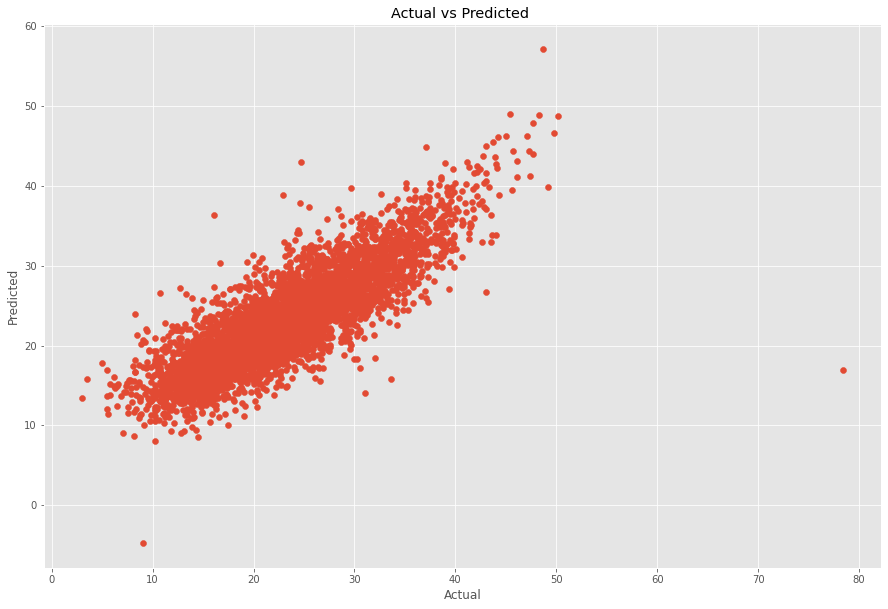

In [49]:
plt.figure(figsize =(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted ')
plt.show()

In [50]:
Data={'Actual value': y_test,'Predicted value':y_pred,'Difference':y_test - y_pred}
y_pred_df=pd.DataFrame(Data)
y_pred_df

,Actual value,Predicted value,Difference
0,19.5,16.033444,3.466556
1,19.0,17.901611,1.098389
2,24.4,19.896123,4.503877
3,13.7,18.099232,-4.399232
4,25.5,20.471264,5.028736
...,...,...,...
4460,20.0,21.006928,-1.006928
4461,34.8,28.361110,6.438890
4462,10.6,16.493434,-5.893434
4463,23.9,23.007459,0.892541
